# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# for clipping outlier using IQR 
d=pd.read_csv('g-9-w.csv')
d=d.iloc[:,1:14].astype(float)
for col in range(1,13):
    q1, q3= np.percentile(d.iloc[:,col],[25,75])
    iqr = q3 - q1;
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) # 1.5 times can be changed
    d[d.columns[col]][d.iloc[:,col]<=lower_bound]=lower_bound;
    d[d.columns[col]][d.iloc[:,col]>=upper_bound]=lower_bound;
    col_mean=d.iloc[:,col].mean()
    d.iloc[:,col].fillna(col_mean,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [3]:
d.columns

Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12'],
      dtype='object')

In [4]:
#Discretization of Y
level=(max(d.y)-min(d.y))/5.0
l1=min(d.y)+level
l2=l1+level
l3=l2+level
l4=l3+level
d['y'].loc[d.y<=l1]=1
d['y'].loc[(d.y>l1) & (d.y<=l2)]=2
d['y'].loc[(d.y>l2) & (d.y<=l3)]=3
d['y'].loc[(d.y>l3) & (d.y<=l4)]=4
d['y'].loc[d.y>l4]=5

In [5]:
#discretizatio of predictor 1
pred1=d.columns[6]
level=(max(d[pred1])-min(d[pred1]))/3.0
l1=min(d[pred1])+level
l2=l1+level
d[pred1].loc[d[pred1]<=l1]=1
d[pred1].loc[(d[pred1]>l1) & (d[pred1]<=l2)]=2
d[pred1].loc[d[pred1]>l2]=3

In [6]:
#discretizatio of predictor 2
pred2=d.columns[8] # any predictor can be chosen randomly
level=(max(d[pred2])-min(d[pred2]))/5.0
l1=min(d[pred2])+level
l2=l1+level
l3=l2+level
l4=l3+level
d[pred2].loc[d[pred2]<=l1]=1
d[pred2].loc[(d[pred2]>l1) & (d[pred2]<=l2)]=2
d[pred2].loc[(d[pred2]>l2) & (d[pred2]<=l3)]=3
d[pred2].loc[(d[pred2]>l3) & (d[pred2]<=l4)]=4
d[pred2].loc[d[pred2]>l4]=5

In [7]:
d.to_csv('g-09-w2.csv',index=False)

# Decision Tree

In [8]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
d=pd.read_csv('g-09-w2.csv')

In [10]:
X_train, X_test, y_train, y_test = train_test_split( d.iloc[:,1:], d.iloc[:,0], test_size = 0.3, random_state = 100)

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6333333333333333


In [13]:
feature_cols=list(d.columns[1:])
feature_cols

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']

In [14]:
class_names=np.unique(d.y)
class_names.tolist()
class_names = [str(x) for x in class_names]
class_names

['1.0', '2.0', '3.0', '4.0', '5.0']

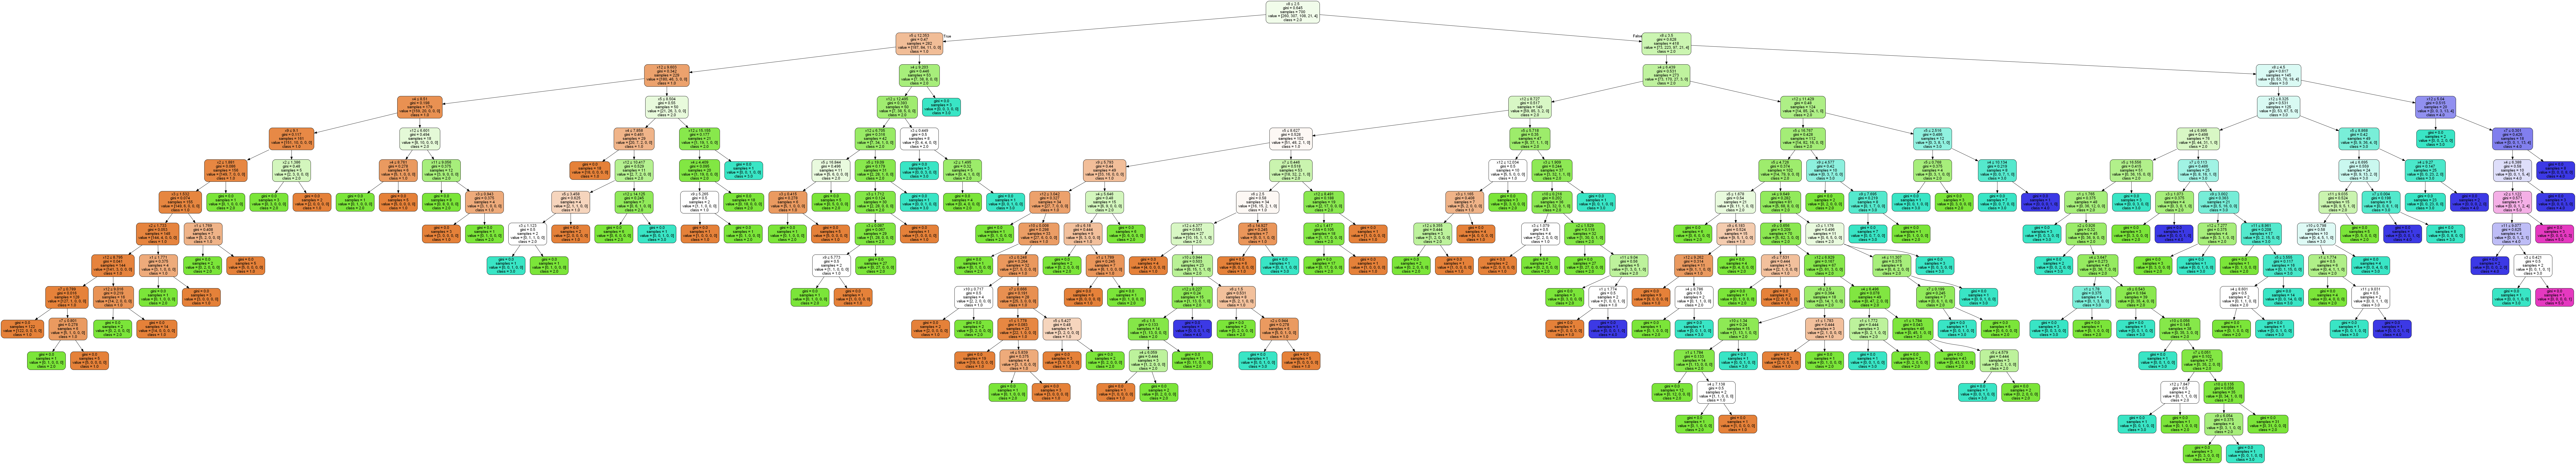

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())